In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RAIN_PATH_PREF = 'precipitation_data/o_m_'
TEMP_PATH_PREF = 'temperature_data/k_m_t_'
SUFFIX = '.csv'

TEMP_DATA_NAMES = ['Region', 'Year', 'Month', 'Temperature'] # średnia miesięczna temperatura w stopniach celcjusza
RAIN_DATA_NAMES = ['Region', 'Year', 'Month', 'Precipitation'] # miesięczna suma opadów w milimetrach

In [2]:
def read_temperature_data(region: str, year: int):
    p = TEMP_PATH_PREF + str(year) + SUFFIX
    df = pd.read_csv(p, encoding='unicode_escape', header=None, usecols=[1, 2, 3, 4])
    df = df.loc[df[1] == region]
    
    return pd.DataFrame(list(zip(df[1], df[2], df[3], df[4])), columns=TEMP_DATA_NAMES)

def get_month_temperature_data(region: str, month: int, first_year: int = 2013, last_year: int = 2023):
    month_temperatures = []
    years = list(range(first_year, last_year + 1))
    l = len(years)
    for year in years:
        d = read_temperature_data(region, year)
        month_temperatures.append(list(d.loc[d['Month'] == month]['Temperature'])[0])

    return pd.DataFrame(list(zip([region]*l, years, [month]*l, month_temperatures)), columns=TEMP_DATA_NAMES)

In [3]:
def read_precipitation_data(region: str, year: int):
    p = RAIN_PATH_PREF + str(year) + SUFFIX
    df = pd.read_csv(p, encoding='unicode_escape', header=None, usecols=[1, 2, 3, 4])
    df = df.loc[df[1] == region]
    
    return pd.DataFrame(list(zip(df[1], df[2], df[3], df[4])), columns=RAIN_DATA_NAMES)

def get_month_precipitation_data(region: str, month: int, first_year: int = 2013, last_year: int = 2023):
    month_precipitation = []
    years = list(range(first_year, last_year + 1))
    l = len(years)
    for year in years:
        d = read_precipitation_data(region, year)
        month_precipitation.append(list(d.loc[d['Month'] == month]['Precipitation'])[0])

    return pd.DataFrame(list(zip([region]*l, years, [month]*l, month_precipitation)), columns=RAIN_DATA_NAMES)

In [4]:
import os

def save_average_monthly_data(year,y):
    temp_path = TEMP_PATH_PREF + str(year) + SUFFIX
    rain_path = RAIN_PATH_PREF + str(year) + SUFFIX

    if not os.path.exists(temp_path) or not os.path.exists(rain_path):
        print(f"Data files for year {year} not found. Skipping this year.")
        return None
    
    df_t = pd.read_csv(temp_path, encoding='unicode_escape', header=None, usecols=[1, 2, 3, 4])
    df_t = pd.DataFrame(list(zip(df_t[1], df_t[2], df_t[3], df_t[4])), columns=TEMP_DATA_NAMES)

    df_p = pd.read_csv(rain_path, encoding='unicode_escape', header=None, usecols=[1, 2, 3, 4])
    df_p = pd.DataFrame(list(zip(df_p[1], df_p[2], df_p[3], df_p[4])), columns=RAIN_DATA_NAMES)

    monthly_temperatures = {month: [] for month in range(4, 8)}
    for ind in df_t.index:
        month = df_t["Month"][ind]
        if month in monthly_temperatures:
            monthly_temperatures[month].append(df_t["Temperature"][ind])

    monthly_precipitation = {month: [] for month in range(4, 8)}
    for ind in df_p.index:
        month = df_p["Month"][ind]
        if month in monthly_precipitation:
            monthly_precipitation[month].append(df_p["Precipitation"][ind])

    average_temperatures = [np.mean(monthly_temperatures[month]) if monthly_temperatures[month] else np.nan for month in range(4, 8)]
    average_precipitation = [np.mean(monthly_precipitation[month]) if monthly_precipitation[month] else np.nan for month in range(4, 8)]

    data = {
        "year": year,
        "pIV": average_precipitation[0],
        "pV": average_precipitation[1],
        "pVI": average_precipitation[2],
        "pVII": average_precipitation[3],
        "tIV": average_temperatures[0],
        "tV": average_temperatures[1],
        "tVI": average_temperatures[2],
        "tVII": average_temperatures[3],
        "yields":y
    }
    
    return data

def save_average_monthly_data_to_single_csv(start_year, end_year, output_file):
    all_data = []
    df_y = [27.4, 30.5, 26.5, 28.4, 29.8, 23.5, 24.9, 33.1, 31.4, 32.8]
    for year in range(start_year, end_year + 1):
        data = save_average_monthly_data(year,df_y[year-start_year])
        if data is not None:
            all_data.append(data)

    df = pd.DataFrame(all_data)
    df.to_csv(output_file, index=False)

# Example usage:
save_average_monthly_data_to_single_csv(2013, 2022, "average_weather_2013_2022.csv")

In [6]:
save_average_monthly_data_in_year(2018)

In [7]:
yt_df = read_temperature_data('PSZCZYNA', 2023)
yt_df

,Region,Year,Month,Temperature
0,PSZCZYNA,2023,1,2.4
1,PSZCZYNA,2023,2,0.8
2,PSZCZYNA,2023,3,5.6
3,PSZCZYNA,2023,4,7.8
4,PSZCZYNA,2023,5,12.6
5,PSZCZYNA,2023,6,17.8
6,PSZCZYNA,2023,7,19.8
7,PSZCZYNA,2023,8,19.5
8,PSZCZYNA,2023,9,17.3
9,PSZCZYNA,2023,10,12.0


In [8]:
yp_df = read_precipitation_data('WARSZOWICE', 2023)
yp_df

,Region,Year,Month,Precipitation
0,WARSZOWICE,2023,1,78.9
1,WARSZOWICE,2023,2,51.2
2,WARSZOWICE,2023,3,37.4
3,WARSZOWICE,2023,4,63.5
4,WARSZOWICE,2023,5,63.7
5,WARSZOWICE,2023,6,59.8
6,WARSZOWICE,2023,7,62.9
7,WARSZOWICE,2023,8,121.4
8,WARSZOWICE,2023,9,58.8
9,WARSZOWICE,2023,10,78.4


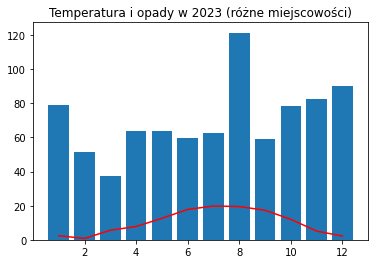

In [9]:
plt.bar(yp_df['Month'], yp_df['Precipitation'])
plt.plot(yt_df['Month'], yt_df['Temperature'], 'r')
plt.title("Temperatura i opady w 2023 (różne miejscowości)")
plt.show()

In [10]:
mt_df = get_month_temperature_data('PSZCZYNA', 8)
mt_df

,Region,Year,Month,Temperature
0,PSZCZYNA,2013,8,18.6
1,PSZCZYNA,2014,8,16.6
2,PSZCZYNA,2015,8,21.6
3,PSZCZYNA,2016,8,17.3
4,PSZCZYNA,2017,8,19.8
5,PSZCZYNA,2018,8,20.5
6,PSZCZYNA,2019,8,20.2
7,PSZCZYNA,2020,8,19.8
8,PSZCZYNA,2021,8,17.3
9,PSZCZYNA,2022,8,19.7


In [11]:
mp_df = get_month_precipitation_data('WARSZOWICE', 8)
mp_df

,Region,Year,Month,Precipitation
0,WARSZOWICE,2013,8,22.4
1,WARSZOWICE,2014,8,143.7
2,WARSZOWICE,2015,8,22.6
3,WARSZOWICE,2016,8,83.0
4,WARSZOWICE,2017,8,69.5
5,WARSZOWICE,2018,8,40.0
6,WARSZOWICE,2019,8,72.4
7,WARSZOWICE,2020,8,88.6
8,WARSZOWICE,2021,8,199.0
9,WARSZOWICE,2022,8,127.4


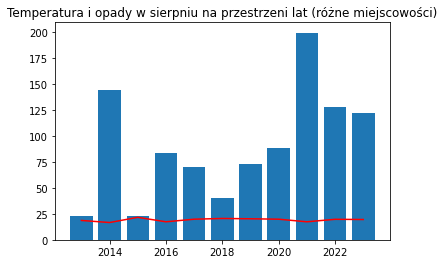

In [12]:
plt.bar(mp_df['Year'], mp_df['Precipitation'])
plt.plot(mt_df['Year'], mt_df['Temperature'], 'r')
plt.title("Temperatura i opady w sierpniu na przestrzeni lat (różne miejscowości)")
plt.show()

Temperatura równiutka a opady powalone :(